## ADM1F: Steady State

Here we run the steady state case and comparing it with the Matlab results. Make sure to compile `build/adm1f.cxx`. 

Author: Elchin Jafarov

#### 1. Steady State Run

In [1]:
import os
import numpy as np
import pandas as pd
import subprocess
import sklearn.metrics as sklm
import xlrd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# navigate to simulations folder
os.chdir('../simulations')

In [3]:
# check the path to the executable 
!echo $ADM1F_EXE

/Users/elchin/project/ADM1F_WM/build/adm1f


In [4]:
# running the executable in the cell
!$ADM1F_EXE -steady

Vliq [m3] is: 3400.000000
Vgas [m3] is: 300.000000
Reading parameters in file: params.dat
Reading influent values in file: influent.dat
Reading initial condition values in file: ic.dat
Running as steady state problem.
Solving.
Done!


In [5]:
# remove the output files
!sh clean.sh

In [6]:
# or run using subprocess 
subprocess.Popen('$ADM1F_EXE -ts_monitor -steady', shell=True)

If the run is successful then `indicator-***.out` should be saved in the `simulations` folder. Here take the last time step saved in the last indicator file (`indicator-062.out`). The accending numeration of the output files corresponds to the time iterations taken towards the steady state condition.   

#### 2. Comparison of the ADM1F (C++) with ADM1 (Matlab)

The ADM1F runs much faster than the corresponding Matlab version. The main difference between C++ and the Matlab versions of the model is that ADM1F uses optimized solvers from the PETCS package to solve the corresponding mass balance equations. The ADM1F allows usage of the diffrent solvers. The ADM1(Matlab) is using ode45 nonstiff differential equation solver that cannot be changed. Below we benchmark ADM1F(C++) outputs with the ADM1(Matlab). 

In [7]:
# read the output produced by ADM1(Matlab) from the xls file
wb = xlrd.open_workbook('../notebooks/out_sludge.xls')
sheet = wb.sheet_by_index(1)
results_matlab = [sheet.cell_value(4,i) for i in range(66)]

load the last file from the steady runs and compare it with the Matlab output. 

In [8]:
results_c=np.loadtxt('indicator-062.out', skiprows=2, unpack=True)

In [9]:
res = pd.DataFrame({
    "Matlab": np.asarray(results_matlab),
    "C++": np.asarray(results_c[:-1])})
res.head()

,Matlab,C++
0,10.116210,10.11620
1,4.529384,4.52938
2,83.095031,83.09500
3,9.171951,9.17149
4,11.824647,11.82410


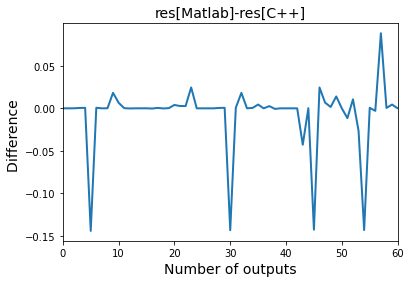

In [10]:
plt.plot(res['Matlab']-res['C++'],linewidth=2)
plt.xlabel('Number of outputs',fontsize=14)
plt.ylabel('Difference ',fontsize=14);
plt.title('res[Matlab]-res[C++]',fontsize=14)
plt.xlim([0,60]);

In [11]:
rmse=sklm.mean_squared_error(res['Matlab'],res['C++'])
mae=sklm.mean_absolute_error(res['Matlab'],res['C++'])
r2=sklm.r2_score(res['Matlab'],res['C++'])
print('MAE:',round(mae,4))
print('RMSE:',round(rmse,4))
print('R2 Score:',round(r2,4))

MAE: 0.0136
RMSE: 0.0014
R2 Score: 1.0
